## 휴먼지능정보공학과 201910787 김영서

## 문제 1번

### 문제 1-1의 답

In [354]:
%%writefile src/1-1.js
console.log(JSON.stringify(admin.nodeInfo));
if (eth.chainId() == 36) {
    console.log('\n Your chainId',eth.chainId(),'@127.0.0.1 is a private network');
}

Overwriting src/1-1.js


In [355]:
!geth --exec "loadScript('src/1-1.js')"  attach http://localhost:8446

{"id":"287769f09bb4f6a800479ede91426e4ff7d3ec1161a418b97bc953209250aa76","name":"Geth/zaqxs/v1.10.1-stable-c2d2f4ed/windows-amd64/go1.16","enode":"enode://92c6dd63c3643b792d6344612b950cf69339a90fa45edfa983ad2e67740fed97c31e3825e9f672d96e6db1859edcada302cf9f8134ad80c9f87ef145a2e73abc@127.0.0.1:38445","enr":"enr:-J24QCu7Naq8qcjTnvFntZH6AEqWVZmyFJW4FKvwJRoly7e-SuDh8K8iIFv9DWOjDbEVXMZ7Tcn5jiCDoQtZg37g1oICg2V0aMfGhCToWBqAgmlkgnY0gmlwhH8AAAGJc2VjcDI1NmsxoQKSxt1jw2Q7eS1jRGErlQz2kzmpD6Re36mDrS5ndA_tl4RzbmFwwIN0Y3CCli2DdWRwgpYt","ip":"127.0.0.1","ports":{"discovery":38445,"listener":38445},"listenAddr":"[::]:38445","protocols":{"eth":{"network":36,"difficulty":97376351,"genesis":"0x5704d029fe80f4fb605c0cb5e31d591511f10a46a0cb8166f97d8d559f9bc5b0","config":{"chainId":36,"homesteadBlock":0,"eip150Block":0,"eip150Hash":"0x0000000000000000000000000000000000000000000000000000000000000000","eip155Block":0,"eip158Block":0},"head":"0xe5cd4b38c005fcde7cab2a8336dd27ea20d0c9a316b981a486c6ff822e64572f"},"s

**포트번호가 8446, ip가 127.0.0.1, networkid가 36번인 geth@8446 서버가 생성된것을 볼 수 있다. (0x24(16) = 36(10))**

### 문제 1-2의 답

In [375]:
%%writefile src/accounts.js
console.log('accounts: ',eth.accounts);

Overwriting src/accounts.js


In [376]:
!geth --exec "loadScript('src/accounts.js')" attach http://localhost:8446

accounts:  0xa3639ace2951727552f1b9bf2ef8b290e1bda078,0x6a76fab2863f808a63a75aa5469f5a5c41ff889d
null


In [377]:
%%writefile src/1-2.js
var ac1=eth.getBalance(eth.coinbase)
var ac2=eth.getBalance(eth.accounts[1])
console.log('-Before');
console.log('  -coinbase balance in Wei:',ac1,' ether:',web3.fromWei(ac1,"ether"));
console.log('  -account1 balance in Wei:',ac2,' ether:',web3.fromWei(ac2,"ether"));
console.log('  -transaction count: ', web3.eth.getTransactionCount(eth.accounts[0]));

Overwriting src/1-2.js


In [378]:
!geth --exec "loadScript('src/1-2.js')" attach http://localhost:8446

-Before
  -coinbase balance in Wei: 3.10629499999999717172e+21  ether: 3106.29499999999717172
  -account1 balance in Wei: 319330000000002828280  ether: 319.33000000000282828
  -transaction count:  34
null


### 문제 1-3의 답

In [379]:
%%writefile src/1-3.js
console.log('...mining start');
var sender = eth.coinbase;
var receiver = eth.accounts[1];
var t = eth.sendTransaction({from:eth.coinbase, to:eth.accounts[1], value:web3.toWei(0.00000000000010101,"ether")});
console.log(t);
console.log('mining done...');

Overwriting src/1-3.js


In [381]:
!geth --exec "loadScript('src/1-3.js')" attach http://localhost:8446

...mining start
0x05a660a87347d66731e9fe7cec0e7dc9dca87255daf51a0206ed1db3b2ea028f
mining done...
null


### 문제 1-4의 답

In [382]:
%%writefile src/1-4.js
var ac1=eth.getBalance(eth.coinbase);
var ac2=eth.getBalance(eth.accounts[1]);
var afterBal = 2893.48249999999727273;
console.log('-After');
console.log('  -coinbase balance in ether:',web3.fromWei(ac1,"ether"));
console.log('  -account1 balance in ether:',web3.fromWei(ac2,"ether"),
            'increasde by',web3.fromWei(ac1,"ether")-web3.fromWei(ac2,"ether"));
console.log('  -transaction count: ', web3.eth.getTransactionCount(eth.accounts[0]),'increased by 1');
console.log('  -gas used:',web3.fromWei(ac1,"ether")-afterBal,
            'won (1 ether = 2500000):',0.000000000000021*2500000);

Overwriting src/1-4.js


In [383]:
!geth --exec "loadScript('src/1-4.js')" attach http://localhost:8446

-After
  -coinbase balance in ether: 3120.20124999999707071
  -account1 balance in ether: 319.33000000000292929 increasde by 2800.871249999994
  -transaction count:  35 increased by 1
  -gas used: 226.71874999999955 won (1 ether = 2500000): 5.25e-8
null


## 문제 2번

### 문제 2-1의 답

In [218]:
%%writefile src/Math.sol
pragma solidity 0.5.10;

contract Math {
    function powerOf2(uint256 input) public pure returns (uint256){
        return 2**input;
    }
}

Overwriting src/Math.sol


### 문제 2-5의 답

In [219]:
!solc --abi --bin --gas src/Math.sol


======= src/Math.sol:Math =======
Gas estimation:
construction:
   87 + 34800 = 34887
external:
   powerOf2(uint256):	1891
Binary: 
6080604052348015600f57600080fd5b5060ae8061001e6000396000f3fe6080604052348015600f57600080fd5b506004361060285760003560e01c8063bdacc0cf14602d575b600080fd5b605660048036036020811015604157600080fd5b8101908080359060200190929190505050606c565b6040518082815260200191505060405180910390f35b60008160020a905091905056fea265627a7a72305820511fc582b18a0b1524e2264fd140bb547d039dbf08d1dba4b6f34813690ff9f364736f6c634300050a0032
Contract JSON ABI 
[{"constant":true,"inputs":[{"name":"input","type":"uint256"}],"name":"powerOf2","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"pure","type":"function"}]


### 문제 2-2의 답

In [350]:
%%writefile src/mathDeploy.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://localhost:8345"));
}
var _abiArray=[{"constant":true,"inputs":[{"name":"input","type":"uint256"}],"name":"powerOf2","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"pure","type":"function"}];
var _bin="6080604052348015600f57600080fd5b5060ae8061001e6000396000f3fe6080604052348015600f57600080fd5b506004361060285760003560e01c8063bdacc0cf14602d575b600080fd5b605660048036036020811015604157600080fd5b8101908080359060200190929190505050606c565b6040518082815260200191505060405180910390f35b60008160020a905091905056fea265627a7a72305820511fc582b18a0b1524e2264fd140bb547d039dbf08d1dba4b6f34813690ff9f364736f6c634300050a0032";
var _contract = new web3.eth.Contract(_abiArray);
_contract
    .deploy({data:"0x"+_bin})
    .send({from: "0x98F52EC4880049c156a914f98911Fa56F5b5Dbac", gas: 364124, gasPrice: '1000000000'})
    .then(function(newContractInstance){
        console.log(newContractInstance.options.address) // instance with the new contract address
    });

Overwriting src/mathDeploy.js


In [221]:
!node src/mathDeploy.js

0x2FaC54e3931538f70e1892D38A4b6F8f1fAF9A68


### 문제 2-3의 답

In [222]:
%%writefile src/MathUse.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://localhost:8345"));
var abi = [{"constant":true,"inputs":[{"name":"input","type":"uint256"}],"name":"powerOf2","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"pure","type":"function"}];
var addr = "0x2FaC54e3931538f70e1892D38A4b6F8f1fAF9A68";
var mul = new web3.eth.Contract(abi,addr);
mul.methods.powerOf2(8).call().then(function(str) {console.log(str);});
mul.methods.powerOf2(32).call().then(function(str) {console.log(str);});

Overwriting src/MathUse.js


In [223]:
!node src/MathUse.js

256
4294967296


### 문제 2-4의 답

In [231]:
%%writefile scripts/powerOf2.html
<!doctype>
<html>
<head>
<script src="https://cdn.jsdelivr.net/npm/web3@1.2.7/dist/web3.min.js"></script>
<script type="text/javascript">
    var web3 = new Web3(new Web3.providers.HttpProvider("http://localhost:8345"));
    function result(){
        var shelloContract = new web3.eth.Contract([{"constant":true,"inputs":[{"name":"input","type":"uint256"}],"name":"powerOf2","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"pure","type":"function"}],
                                      "0x2FaC54e3931538f70e1892D38A4b6F8f1fAF9A68");
        shelloContract.methods.powerOf2(32).call().then(res=>
                                                     document.getElementById('powerOf2').innerText="2^32 = "+res);
    }
</script>
</head>
<body>
    <h1>powerOf2</h1>
    <button type="button" onClick="result();">Display 2^32</button>
    <div></div>
    <div id="powerOf2"></div>
</body>
</html>

Overwriting scripts/powerOf2.html


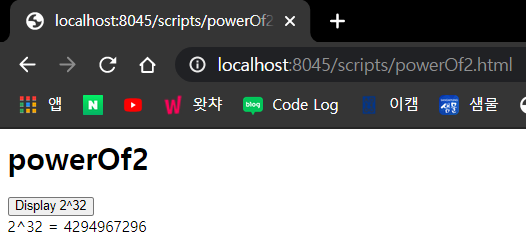

In [235]:
from IPython.display import Image
Image("powerOf2.png")

### 문제 2-6의 답

**geth@8446 서버에서 배포하고 사용하였다.**

In [341]:
!solc --abi --bin --gas src/Math.sol


======= src/Math.sol:Math =======
Gas estimation:
construction:
   87 + 34800 = 34887
external:
   powerOf2(uint256):	1891
Binary: 
6080604052348015600f57600080fd5b5060ae8061001e6000396000f3fe6080604052348015600f57600080fd5b506004361060285760003560e01c8063bdacc0cf14602d575b600080fd5b605660048036036020811015604157600080fd5b8101908080359060200190929190505050606c565b6040518082815260200191505060405180910390f35b60008160020a905091905056fea265627a7a72305820511fc582b18a0b1524e2264fd140bb547d039dbf08d1dba4b6f34813690ff9f364736f6c634300050a0032
Contract JSON ABI 
[{"constant":true,"inputs":[{"name":"input","type":"uint256"}],"name":"powerOf2","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"pure","type":"function"}]


In [349]:
%%writefile src/mathDeploy_geth.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://localhost:8446"));
}
var _abiArray=[{"constant":true,"inputs":[{"name":"input","type":"uint256"}],"name":"powerOf2","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"pure","type":"function"}];
var _bin="6080604052348015600f57600080fd5b5060ae8061001e6000396000f3fe6080604052348015600f57600080fd5b506004361060285760003560e01c8063bdacc0cf14602d575b600080fd5b605660048036036020811015604157600080fd5b8101908080359060200190929190505050606c565b6040518082815260200191505060405180910390f35b60008160020a905091905056fea265627a7a72305820511fc582b18a0b1524e2264fd140bb547d039dbf08d1dba4b6f34813690ff9f364736f6c634300050a0032";
var _contract = new web3.eth.Contract(_abiArray);
_contract
    .deploy({data:"0x"+_bin})
    .send({from: "0xa3639ace2951727552f1b9bf2ef8b290e1bda078", gas: 364124, gasPrice: '1000000000'})
    .then(function(newContractInstance){
        console.log(newContractInstance.options.address) // instance with the new contract address
    });

Overwriting src/mathDeploy_geth.js


In [345]:
!node src/mathDeploy_geth.js

0x7b2786Bb89b7B27357Cb594218c19B94F62C3F52


In [351]:
%%writefile src/MathUse_geth.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://localhost:8446"));
var abi = [{"constant":true,"inputs":[{"name":"input","type":"uint256"}],"name":"powerOf2","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"pure","type":"function"}];
var addr = "0x7b2786Bb89b7B27357Cb594218c19B94F62C3F52";
var mul = new web3.eth.Contract(abi,addr);
mul.methods.powerOf2(8).call().then(function(str) {console.log(str);});
mul.methods.powerOf2(32).call().then(function(str) {console.log(str);});

Overwriting src/MathUse_geth.js


In [347]:
!node src/MathUse_geth.js

256
4294967296
